# Проект "стартап по продаже продуктов питания"

## Описание проекта

Стартап, который продаёт продукты питания. Нужно разобраться, как ведут себя пользователи мобильного приложения.


- Изучить воронку продаж. 
- Как пользователи доходят до покупки?
- Сколько пользователей доходит до покупки, а сколько — «застревает» на предыдущих шагах? (На каких именно?)
После этого исследовать результаты A/A/B-эксперимента. 

Дизайнеры захотели поменять шрифты во всём приложении, а менеджеры испугались, что пользователям будет непривычно. Договорились принять решение по результатам A/A/B-теста. Пользователей разбили на 3 группы: 2 контрольные со старыми шрифтами и одну экспериментальную — с новыми.

- Выяснить, какой шрифт лучше.

## План действий:


*   Импорт файлов
*   Подготовим данные
*   Изучим и проверим данные
*   Опредлеим границы исследования
*   Изучение воронки событий
*   Проведем А/А и А/В тестирование
*   Выводы, рекомнедации, ответы на вопросы




## Импорт файлов

https://drive.google.com/file/d/18NEoKmv6SL1_S-eucYTVEDzl-tyDhfYF/view?usp=sharing

In [ ]:
!gdown 18NEoKmv6SL1_S-eucYTVEDzl-tyDhfYF

Downloading...
From: https://drive.google.com/uc?id=18NEoKmv6SL1_S-eucYTVEDzl-tyDhfYF
To: /content/logs_exp.csv
100% 13.2M/13.2M [00:00<00:00, 104MB/s] 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as mth
from math import sqrt
import scipy.stats as st
import plotly.express as px

In [ ]:
try:
  df = pd.read_csv('/content/logs_exp.csv', sep='\t')
except:
  df = pd.read_csv('/datasets/logs_exp.csv', sep='\t')

In [ ]:
df.head()

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


## Подготовка данных

In [ ]:
# замена названия столбцов
df.columns = ['event_name', 'device_id_hash', 'event_timestamp', 'exp_id']

In [ ]:
# проверка на пропуски
df.isna().sum()

event_name         0
device_id_hash     0
event_timestamp    0
exp_id             0
dtype: int64

In [ ]:
# перевод в формат даты
df['date_time'] = pd.to_datetime(df['event_timestamp'], unit='s')

In [ ]:
# доп столбец с датой
df['date'] = df['date_time'].dt.date.astype('datetime64')

In [ ]:
# шаблон для таблиц
plt.rcParams["figure.figsize"] = (14,6)
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }

In [ ]:
# два знака после заяпятой
pd.set_option('display.float_format', '{:.2f}'.format)

## Изучение и проверка данных

In [ ]:
# сколько событий в логе
print('Событий в логе', df['event_name'].count())

Событий в логе 244126


In [ ]:
# сколько пользователей в логе
print('Пользователей в логе', df['device_id_hash'].nunique())

Пользователей в логе 7551


In [ ]:
print('В среднем событий приходится на пользователя', df['event_name'].count() / df['device_id_hash'].nunique())

В среднем событий приходится на пользователя 32.33028737915508


In [ ]:
# диапазон дат
df.groupby('date')['exp_id'].count().reset_index()

,date,exp_id
0,2019-07-25,9
1,2019-07-26,31
2,2019-07-27,55
3,2019-07-28,105
4,2019-07-29,184
5,2019-07-30,413
6,2019-07-31,2031
7,2019-08-01,36229
8,2019-08-02,35606
9,2019-08-03,33351


In [ ]:
print('min data', df['date_time'].min())
print('max data', df['date_time'].max())

min data 2019-07-25 04:43:36
max data 2019-08-07 21:15:17


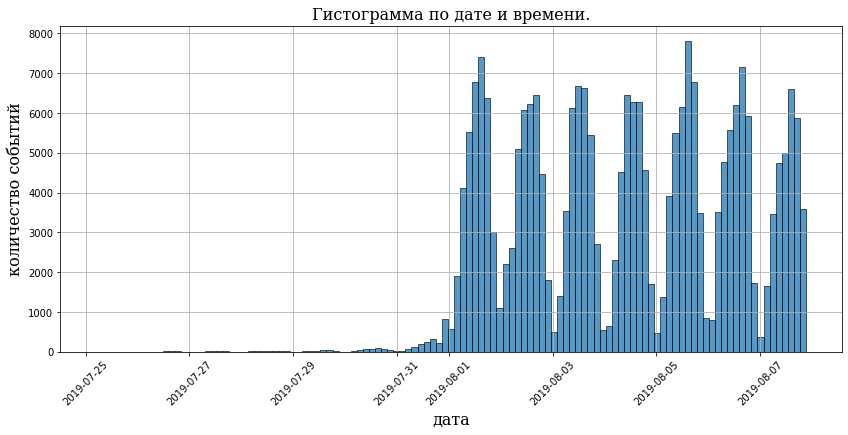

In [ ]:
# гисторамма по дате и количеству событий
ax=sns.histplot(df['date_time'])

plt.title('Гистограмма по дате и времени.', fontdict=font)
#plt.legend() 
plt.xticks(rotation = 45) 
plt.xlabel('дата', fontdict=font)
plt.ylabel('количество событий', fontdict=font)
plt.ylim(0)
plt.grid(True)
plt.show()

### Вывод: 
из графика видно что данных до 2019-07-31 не достаточно для анализа, поэтому очистим данные. Возьмем данные из таблицы начиная с 2019-08-01 

In [ ]:
# очищаем данные
df = df.query('date >= "2019-08-01"')

In [ ]:
# диапазон дат
df.groupby('date')['exp_id'].count().reset_index()

,date,exp_id
0,2019-08-01,36229
1,2019-08-02,35606
2,2019-08-03,33351
3,2019-08-04,33033
4,2019-08-05,36113
5,2019-08-06,35822
6,2019-08-07,31144


## Много ли событий и пользователей вы потеряли, отбросив старые данные?

In [ ]:
# сколько событий в логе
print('Событий в логе', df['event_name'].count(), ', что примерно на 3000 событий меньше')

Событий в логе 241298 , что примерно на 3000 событий меньше


In [ ]:
# сколько пользователей в логе
print('Пользователей в логе', df['device_id_hash'].nunique()), ', что на 17 пользователей меньше'

Пользователей в логе 7534


(None, ', что на 17 пользователей меньше')

In [ ]:
# проверям сколько эксперементальных групп
df.groupby('exp_id')['device_id_hash'].count().reset_index()

,exp_id,device_id_hash
0,246,79425
1,247,77147
2,248,84726


### Вывод:

 после того как очистили данные, пользователей стало на 17 меньше что статистически не исказит данные. Событий в логе стало меньше примерно на 3000, что так же статистические не значимо. При этом пользователи из всех 3х эксперементальных групп попрежнему присуствуют в таблице. 

## Изучение воронки событий


In [ ]:
# какие события есть в логах, как часто они встречаются
df.groupby('event_name')['exp_id'].agg(['count']).sort_values('count', ascending=False)

,count
event_name,
MainScreenAppear,117431
OffersScreenAppear,46350
CartScreenAppear,42365
PaymentScreenSuccessful,34113
Tutorial,1039


In [ ]:
# сколько пользователей совершали каждое из этих событий
df.groupby('event_name')['device_id_hash'].agg(['nunique']).sort_values('nunique', ascending=False)

,nunique
event_name,
MainScreenAppear,7419
OffersScreenAppear,4593
CartScreenAppear,3734
PaymentScreenSuccessful,3539
Tutorial,840


In [ ]:
# доля пользователей, которые хоть раз совершали событие
t = df.groupby('event_name')['device_id_hash'].agg(['nunique']).sort_values('nunique', ascending=False).reset_index()
t['pct'] = t['nunique'] / t['nunique'].sum() * 100
t

,event_name,nunique,pct
0,MainScreenAppear,7419,36.86
1,OffersScreenAppear,4593,22.82
2,CartScreenAppear,3734,18.55
3,PaymentScreenSuccessful,3539,17.59
4,Tutorial,840,4.17


Порядок действия видится таким MainScreenAppear ->> OffersScreenAppear ->> CartScreenAppear ->> PaymentScreenSuccessful 

---

Tutorial на него заходят, скорее всего, после покупки. Значит его не будем учитывать в цепочке. 


In [ ]:
# доля пользователей проходит на следующий шаг воронки (от числа пользователей на предыдущем)
t = df.query('event_name != "Tutorial"').groupby('event_name')['device_id_hash'].agg(['nunique']).sort_values('nunique', ascending=False).reset_index()
t['total_pct'] = t['nunique'] / t['nunique'].sum() * 100
t['ratio_pct'] = (t['nunique'] / t['nunique'].shift() * 100).fillna(0)
t

,event_name,nunique,total_pct,ratio_pct
0,MainScreenAppear,7419,38.47,0.00
1,OffersScreenAppear,4593,23.82,61.91
2,CartScreenAppear,3734,19.36,81.30
3,PaymentScreenSuccessful,3539,18.35,94.78


In [ ]:
print('На шаге "OffersScreenAppear" теряется больше всего пользователей:', 100 - t['ratio_pct'][1])

На шаге "OffersScreenAppear" теряется больше всего пользователей: 38.091386979377276


In [ ]:
print('Доля пользователей от первого события до оплаты:', t['nunique'][2] / t['nunique'][0] * 100)

Доля пользователей от первого события до оплаты: 50.330233185065374


In [ ]:
# воронка продаж
fig = px.funnel(t, y='event_name', x='nunique', title='Воронка продаж')

fig.show()

### Вывод по воронке: 

количество пользователей с каждым шагом воронки уменьшается, так как и должно быть. Порядок событий: MainScreenAppear ->> OffersScreenAppear ->> CartScreenAppear ->> PaymentScreenSuccessful. Что касается "Tutorial" на него заходят, скорее всего, после покупки. Значит его не будем учитывать в воронке продаж. На шаге "OffersScreenAppear" теряется больше всего пользователей 38%. Доля пользователей от первого события до оплаты 50%.


## Изучение результатов эксперимента

In [ ]:
# число пользователей в каждой группе
df.groupby('exp_id')['device_id_hash'].nunique().reset_index()

,exp_id,device_id_hash
0,246,2484
1,247,2513
2,248,2537


Есть ли статистическая разница между выборками 246 и 247

In [ ]:
# создание талицы по группе 246
df_246 = (df.query('exp_id == 246 & event_name != "Tutorial"')
          .groupby('event_name')['device_id_hash']
          .agg(['nunique'])
          .reset_index()
)
df_246.loc[-1] = ['TotalUser', df.query('exp_id == 246')['device_id_hash'].nunique()]  
df_246.index = df_246.index + 1  
df_246 = df_246.sort_index().sort_values('nunique', ascending=False)
df_246['246_total_pct'] = df_246['nunique'] / df.query('exp_id == 246')['device_id_hash'].nunique() * 100
df_246['246_pct'] = (df_246['nunique'] / df_246['nunique'].shift() * 100).fillna(0)
df_246.rename(columns = {'nunique': '246'}, inplace = True)

In [ ]:
# создание талицы по группе 247
df_247 = (df.query('exp_id == 247 & event_name != "Tutorial"')
          .groupby('event_name')['device_id_hash']
          .agg(['nunique'])
          .reset_index()
)
df_247.loc[-1] = ['TotalUser', df.query('exp_id == 247')['device_id_hash'].nunique()]  
df_247.index = df_247.index + 1 
df_247 = df_247.sort_index().sort_values('nunique', ascending=False)
df_247['247_total_pct'] = df_247['nunique'] / df.query('exp_id == 247')['device_id_hash'].nunique() * 100
df_247['247_pct'] = (df_247['nunique'] / df_247['nunique'].shift() * 100).fillna(0)
df_247.rename(columns = {'nunique': '247'}, inplace = True)

In [ ]:
# создание талицы по группе 248
df_248 = (df.query('exp_id == 248 & event_name != "Tutorial"')
          .groupby('event_name')['device_id_hash']
          .agg(['nunique'])
          .reset_index()
)
df_248.loc[-1] = ['TotalUser', df.query('exp_id == 248')['device_id_hash'].nunique()]  
df_248.index = df_248.index + 1 
df_248 = df_248.sort_index().sort_values('nunique', ascending=False)
df_248['248_total_pct'] = df_248['nunique'] / df.query('exp_id == 248')['device_id_hash'].nunique() * 100
df_248['248_pct'] = (df_248['nunique'] / df_248['nunique'].shift() * 100).fillna(0)
df_248.rename(columns = {'nunique': '248'}, inplace = True)

In [ ]:
# создание общей таблицы по группам
df_user_group = df_246.merge(df_247, how='left', on='event_name').merge(df_248, how='left', on='event_name')
df_user_group

,event_name,246,246_total_pct,246_pct,247,247_total_pct,247_pct,248,248_total_pct,248_pct
0,TotalUser,2484,100.00,0.00,2513,100.00,0.00,2537,100.00,0.00
1,MainScreenAppear,2450,98.63,98.63,2476,98.53,98.53,2493,98.27,98.27
2,OffersScreenAppear,1542,62.08,62.94,1520,60.49,61.39,1531,60.35,61.41
3,CartScreenAppear,1266,50.97,82.10,1238,49.26,81.45,1230,48.48,80.34
4,PaymentScreenSuccessful,1200,48.31,94.79,1158,46.08,93.54,1181,46.55,96.02


In [ ]:
# замена индекса
df_user_group = df_user_group.set_index('event_name')

In [ ]:
# функция для расчета p-value между группами с помощью z-test
def check_hypothesis(successes1, successes2, trials1, trials2, alpha=0.01):

  successes = np.array([successes1, successes2])
  trials = np.array([trials1, trials2])

  # пропорция успехов
  p1 = successes[0]/trials[0]
  p2 = successes[1]/trials[1]

  # пропорция успехов в комбинированном датасете:
  p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

  # разница пропорций в датасетах
  difference = p1 - p2

  # считаем статистику в ст.отклонениях стандартного нормального распределения
  z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

  # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
  distr = st.norm(0, 1)

  # считаем статистику в ст.отклонениях стандартного нормального распределения
  z_value = difference / mth.sqrt(
      p_combined * (1 - p_combined) * (1 / trials[0] + 1 / trials[1])
  )

  # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
  distr = st.norm(0, 1)

  p_value = (1 - distr.cdf(abs(z_value))) * 2

  print('p-значение: ', p_value)

  if p_value < alpha:
      print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
  else:
      print(
          'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
      )

проверка 246/247 групп

In [ ]:
# проверка групп 246/247 в MainScreenAppear
check_hypothesis(df_user_group.loc['MainScreenAppear', '246'],
                 df_user_group.loc['MainScreenAppear', '247'],
                 df_user_group.loc['TotalUser', '246'],
                 df_user_group.loc['TotalUser', '247'],
                 alpha=0.01)

p-значение:  0.7570597232046099
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [ ]:
# проверка групп 246/247 в OffersScreenAppear
check_hypothesis(df_user_group.loc['OffersScreenAppear', '246'],
                 df_user_group.loc['OffersScreenAppear', '247'],
                 df_user_group.loc['TotalUser', '246'],
                 df_user_group.loc['TotalUser', '247'],
                 alpha=0.01)

p-значение:  0.2480954578522181
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [ ]:
# проверка групп 246/247 в CartScreenAppear
check_hypothesis(df_user_group.loc['CartScreenAppear', '246'],
                 df_user_group.loc['CartScreenAppear', '247'],
                 df_user_group.loc['TotalUser', '246'],
                 df_user_group.loc['TotalUser', '247'],
                 alpha=0.01)

p-значение:  0.22883372237997213
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [ ]:
# проверка групп 246/247 в PaymentScreenSuccessful
check_hypothesis(df_user_group.loc['PaymentScreenSuccessful', '246'],
                 df_user_group.loc['PaymentScreenSuccessful', '247'],
                 df_user_group.loc['TotalUser', '246'],
                 df_user_group.loc['TotalUser', '247'],
                 alpha=0.01)

p-значение:  0.11456679313141849
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


### Вывод: статистичеки значимая разница между группами 246 и 247 не обнаружена, группы равны. 

проверка 246/248 групп

In [ ]:
# проверка групп 246/248 в MainScreenAppear
check_hypothesis(df_user_group.loc['MainScreenAppear', '246'],
                 df_user_group.loc['MainScreenAppear', '248'],
                 df_user_group.loc['TotalUser', '246'],
                 df_user_group.loc['TotalUser', '248'],
                 alpha=0.01)

p-значение:  0.2949721933554552
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [ ]:
# проверка групп 246/248 в OffersScreenAppear
check_hypothesis(df_user_group.loc['OffersScreenAppear', '246'],
                 df_user_group.loc['OffersScreenAppear', '248'],
                 df_user_group.loc['TotalUser', '246'],
                 df_user_group.loc['TotalUser', '248'],
                 alpha=0.01)

p-значение:  0.20836205402738917
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [ ]:
# проверка групп 246/248 в CartScreenAppear
check_hypothesis(df_user_group.loc['CartScreenAppear', '246'],
                 df_user_group.loc['CartScreenAppear', '248'],
                 df_user_group.loc['TotalUser', '246'],
                 df_user_group.loc['TotalUser', '248'],
                 alpha=0.01)

p-значение:  0.07842923237520116
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [ ]:
# проверка групп 246/248 в PaymentScreenSuccessful
check_hypothesis(df_user_group.loc['PaymentScreenSuccessful', '246'],
                 df_user_group.loc['PaymentScreenSuccessful', '248'],
                 df_user_group.loc['TotalUser', '246'],
                 df_user_group.loc['TotalUser', '248'],
                 alpha=0.01)

p-значение:  0.2122553275697796
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


### Вывод: статистичеки значимая разница между группами 246 и 248 не обнаружена, группы равны. 

проверка 247/248 групп

In [ ]:
# проверка групп 247/248 в MainScreenAppear
check_hypothesis(df_user_group.loc['MainScreenAppear', '247'],
                 df_user_group.loc['MainScreenAppear', '248'],
                 df_user_group.loc['TotalUser', '247'],
                 df_user_group.loc['TotalUser', '248'],
                 alpha=0.01)

p-значение:  0.4587053616621515
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [ ]:
# проверка групп 247/248 в OffersScreenAppear
check_hypothesis(df_user_group.loc['OffersScreenAppear', '247'],
                 df_user_group.loc['OffersScreenAppear', '248'],
                 df_user_group.loc['TotalUser', '247'],
                 df_user_group.loc['TotalUser', '248'],
                 alpha=0.01)

p-значение:  0.9197817830592261
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [ ]:
# проверка групп 247/248 в CartScreenAppear
check_hypothesis(df_user_group.loc['CartScreenAppear', '247'],
                 df_user_group.loc['CartScreenAppear', '248'],
                 df_user_group.loc['TotalUser', '247'],
                 df_user_group.loc['TotalUser', '248'],
                 alpha=0.01)

p-значение:  0.5786197879539783
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [ ]:
# проверка групп 247/248 в PaymentScreenSuccessful
check_hypothesis(df_user_group.loc['PaymentScreenSuccessful', '247'],
                 df_user_group.loc['PaymentScreenSuccessful', '248'],
                 df_user_group.loc['TotalUser', '247'],
                 df_user_group.loc['TotalUser', '248'],
                 alpha=0.01)

p-значение:  0.7373415053803964
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


### Вывод: статистичеки значимая разница между группами 247 и 248 не обнаружена, группы равны. 

проверка 246+247/248 групп

In [ ]:
# сумма 246+247 
df_user_group['246+247'] = df_user_group.loc[:, '246'] + df_user_group.loc[:, '247']

In [ ]:
# проверка групп 246+247/248 в MainScreenAppear
check_hypothesis(df_user_group.loc['MainScreenAppear', '246+247'],
                 df_user_group.loc['MainScreenAppear', '248'],
                 df_user_group.loc['TotalUser', '246+247'],
                 df_user_group.loc['TotalUser', '248'],
                 alpha=0.01)

p-значение:  0.29424526837179577
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [ ]:
# проверка групп 246+247/248 в OffersScreenAppear
check_hypothesis(df_user_group.loc['OffersScreenAppear', '246+247'],
                 df_user_group.loc['OffersScreenAppear', '248'],
                 df_user_group.loc['TotalUser', '246+247'],
                 df_user_group.loc['TotalUser', '248'],
                 alpha=0.01)

p-значение:  0.43425549655188256
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [ ]:
# проверка групп 246+247/248 в CartScreenAppear
check_hypothesis(df_user_group.loc['CartScreenAppear', '246+247'],
                 df_user_group.loc['CartScreenAppear', '248'],
                 df_user_group.loc['TotalUser', '246+247'],
                 df_user_group.loc['TotalUser', '248'],
                 alpha=0.01)

p-значение:  0.18175875284404386
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [ ]:
# проверка групп 246+247/248 в PaymentScreenSuccessful
check_hypothesis(df_user_group.loc['PaymentScreenSuccessful', '246+247'],
                 df_user_group.loc['PaymentScreenSuccessful', '248'],
                 df_user_group.loc['TotalUser', '246+247'],
                 df_user_group.loc['TotalUser', '248'],
                 alpha=0.01)

p-значение:  0.6004294282308704
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Вывод: статистичеки значимая разница между группами 247+246 и 248 не обнаружена, группы равны.

## Вывод по эксперементу: 

При проверке гипотезы о том, есть ли разница между эксперементальными группами 246/247/248. Причем группы 246 и 247 ничем не отличались, на них мы провели А/А тестирование, мы проводили тестирование на всех этапах воронки, результ: группы равны, значимой разницы нет. 

Далее мы сравнивали группы 246 с группой 248, где шрифт был изменен. Значимой разницы обнаружено не было, группы равны. 

Тоже самое для 247 и 248, значимой разницы не обнаружено, группы равны. 

Так же мы сравнили сумму 246+247 и 248 групп, по всем этапам воронки, значимой разницы не обнаружено, группы равны. 

Всего было проведено 16 z-test'ов, в каждом из них значимой разницы обнаружено не было. При уровне значимости alpha в 1%. Мы выбрали 1% так как современные технологии позволяют нам быть более точными, чем Фишеру в своей книге. Сообщество ученых вообще рекомендует альфу в 0.005, но в данной задаче выборка слишком мала, соотвественно мощность будет маленькой. 

In [ ]:
# общая таблица по воронке
df_user_group

,246,246_total_pct,246_pct,247,247_total_pct,247_pct,248,248_total_pct,248_pct,246+247
event_name,,,,,,,,,,
TotalUser,2484,100.00,0.00,2513,100.00,0.00,2537,100.00,0.00,4997
MainScreenAppear,2450,98.63,98.63,2476,98.53,98.53,2493,98.27,98.27,4926
OffersScreenAppear,1542,62.08,62.94,1520,60.49,61.39,1531,60.35,61.41,3062
CartScreenAppear,1266,50.97,82.10,1238,49.26,81.45,1230,48.48,80.34,2504
PaymentScreenSuccessful,1200,48.31,94.79,1158,46.08,93.54,1181,46.55,96.02,2358


In [ ]:
# воронка продаж по 3м группам 
from plotly import graph_objects as go

fig = go.Figure()

fig.add_trace(go.Funnel(
    name = '246',
    y = df_user_group.index,
    x = df_user_group['246_total_pct'],
    textinfo = "value+percent initial"))

fig.add_trace(go.Funnel(
    name = '247',
    y = df_user_group.index,
    x = df_user_group['247_total_pct'],
    textinfo = "value+percent initial"))

fig.add_trace(go.Funnel(
    name = '248',
    y = df_user_group.index,
    x = df_user_group['248_total_pct'],
    textinfo = "value+percent initial"))

fig.show()

## Общий вывод по проекту:
Воронка продаж выглядит: "MainScreenAppear ->> OffersScreenAppear ->> CartScreenAppear ->> PaymentScreenSuccessful".

46-48% пользователей доходит до покупки. При этом 38-40% "застревают" при переходе с "MainScreenAppear ->> OffersScreenAppear".

По результатам А/В тестирования статистически значимых различий между группами 246/247/248 не обнаружено. 

Зависимсоти между покупкой и различными шрифтами не обнаружено, можно выбрать тот шрифт, что советуют дизайнеры или оставить старый. 
